<a href="https://colab.research.google.com/github/s-srothh/computervision/blob/develop/ImageClassification/FashionMnistClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
from os.path import join
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow as tf
import tensorflow.keras.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
#Define set of parameters
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.001
NUM_CLASSES = 10

In [7]:
#Load data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [8]:
# normalize input data from [0,255] => [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

#transform ground truth to one-hot encoding (meaning e.g. class 2 is represented as [0,1,0,0,0,0,0,0,0,0])
print(y_train.shape)
y_train, y_test = tf.one_hot(y_train, NUM_CLASSES), tf.one_hot(y_test, NUM_CLASSES)
print(y_train.shape)

(60000,)
(60000, 10)


In [9]:
# Split train set into a smaller train set and a validation set
x_train, y_train, x_val, y_val = x_train[0:50000], y_train[0:50000], x_train[50000:], y_train[50000:]

print("Number of training instances: {0}".format(len(x_train)))
print("Number of training instances: {0}".format(len(x_val)))
print("Number of test instances: {0}".format(len(x_test)))

Number of training instances: 50000
Number of training instances: 10000
Number of test instances: 10000


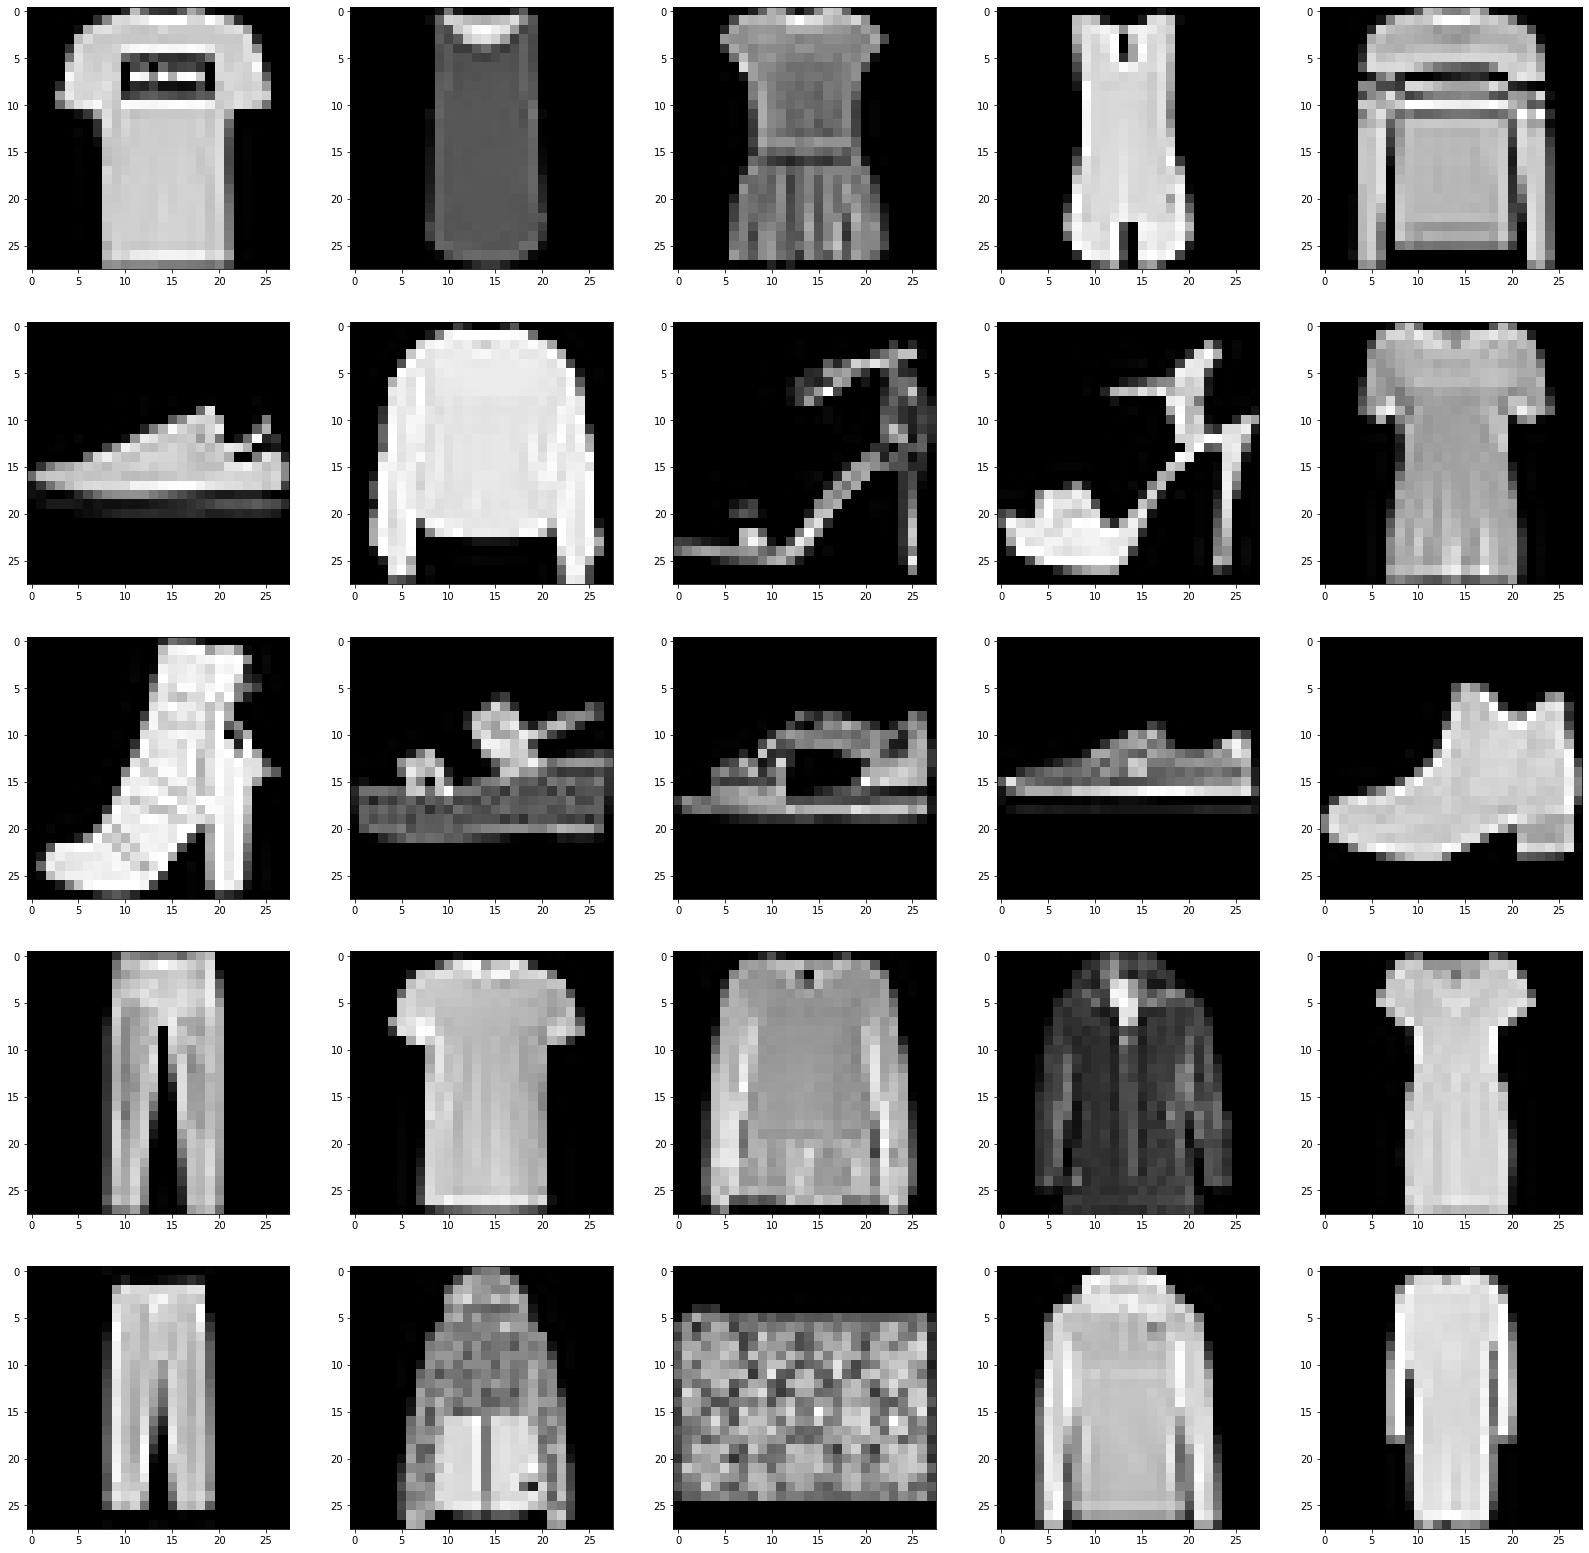

In [10]:
# plotting some examples
fig = plt.figure(figsize=(28, 28))
for i in range(1, 25 +1):
    img = x_train[i]
    fig.add_subplot(5, 5, i)
    plt.imshow(img, cmap='gray')

In [11]:
# extend input data by one dimension
x_train = np.reshape(x_train, (50000, 28, 28, 1))
x_val = np.reshape(x_val, (10000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

In [12]:
train_ds, val_ds = (x_train, y_train), (x_val, y_val)

In [18]:
# Lets build the model 

def fashion_mnist_recognizer():
    model = Sequential([
        layers.Conv2D(128, 7, padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256, 5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(512, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    return model

In [19]:
model = fashion_mnist_digit_recognizer()

optim = keras.optimizers.Adam(LR)

model.compile(optimizer=optim,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Start the training of the model

history = model.fit(
    train_ds[0],
    train_ds[1],
    batch_size= BATCH_SIZE,
    shuffle=True,
    epochs=EPOCHS,
    validation_data= val_ds
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


391/391 [==============================] - 13s 33ms/step - loss: 0.5072 - accuracy: 0.8121 - val_loss: 0.3389 - val_accuracy: 0.8761
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 0.3128 - accuracy: 0.8839 - val_loss: 0.2846 - val_accuracy: 0.8955
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.2655 - accuracy: 0.9008 - val_loss: 0.2638 - val_accuracy: 0.8993
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.2346 - accuracy: 0.9124 - val_loss: 0.2342 - val_accuracy: 0.9106
Epoch 5/10
391/391 [==============================] - 12s 32ms/step - loss: 0.2134 - accuracy: 0.9201 - val_loss: 0.2276 - val_accuracy: 0.9139
Epoch 6/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1929 - accuracy: 0.9279 - val_loss: 0.2411 - val_accuracy: 0.9106
Epoch 7/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1745 - accuracy: 0.9353 - val_loss: 0.2352 - val_accuracy: 0.9150
Epo

In [21]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 1s 10ms/step - loss: 0.2585 - accuracy: 0.9183
test loss, test acc: [0.2585180997848511, 0.9182999730110168]
